In [1]:
!jupyter kernelspec list

Available kernels:
  fbprophet    C:\Users\BHAVANI\AppData\Roaming\jupyter\kernels\fbprophet
  python3      C:\Users\BHAVANI\.conda\envs\tensorflow\share\jupyter\kernels\python3


In [2]:
import pandas as pd
from matplotlib import pyplot
from pandas import to_datetime
#from fbprophet import Prophet

In [3]:
!pip install joblib
import joblib

In [4]:
# load data
df = pd.read_csv('monthly-car-sales.csv')
# summarize shape
df.shape

(108, 2)

In [5]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


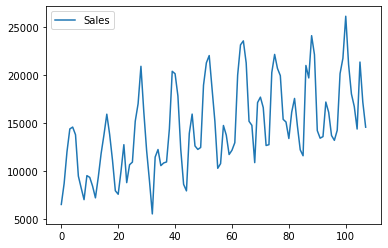

In [6]:
df.plot()
pyplot.show()

In [7]:
!python --version

Python 3.7.13


In [8]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [9]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [10]:
# define the model
import import_ipynb
from fbprophet import Prophet
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Save the model

In [22]:
import joblib
joblib.dump(model, "sales.sav")

['sales.sav']

# Test with future predictions

In [11]:
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    print(date)
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

1969-01
1969-02
1969-03
1969-04
1969-05
1969-06
1969-07
1969-08
1969-09
1969-10
1969-11
1969-12


In [12]:
forecast=model.predict(future)

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,15396.026630,13911.480624,17001.053501
1,1969-02-01,16165.838547,14577.693465,17863.528309
2,1969-03-01,21369.121163,19788.211886,22932.326268
3,1969-04-01,23494.793981,21951.353475,25172.193282
4,1969-05-01,25004.900023,23432.760490,26578.237604
5,1969-06-01,22263.278413,20692.529843,23812.806001
6,1969-07-01,17926.533617,16278.156440,19508.318581
7,1969-08-01,15754.482263,14074.367982,17356.208053
8,1969-09-01,14262.071702,12792.590049,15790.091253
9,1969-10-01,18697.917520,17070.822166,20242.944842


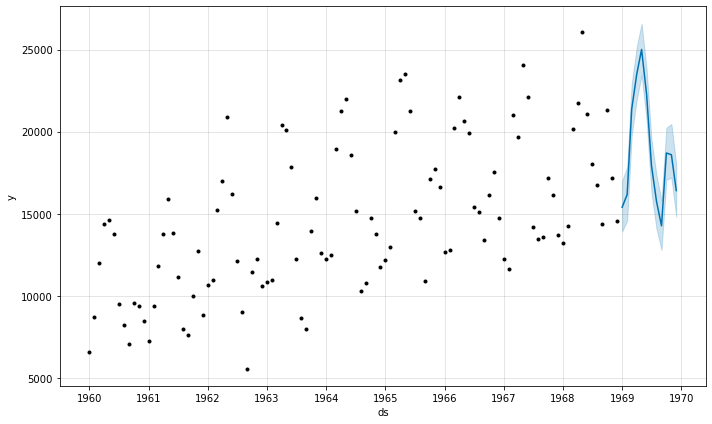

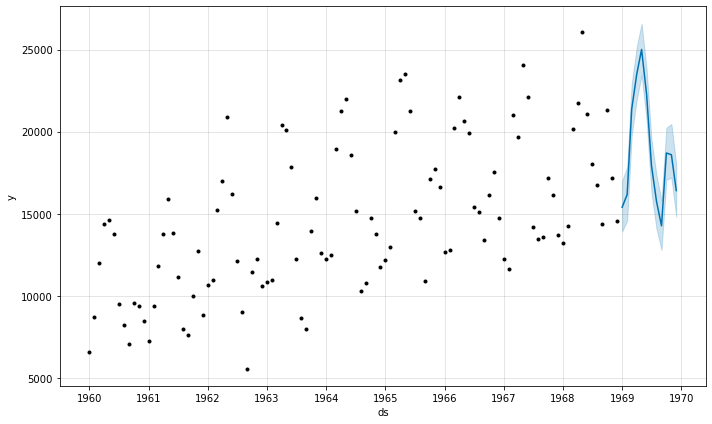

In [14]:
model.plot(forecast)